# Thera Bank Loan Prediction Models

Data Description:
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

Domain: Banking

Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

Learning Outcomes:

Exploratory Data Analysis
Preparing the data to train a model
Training and making predictions using classification models
Model evaluation

Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

Steps and tasks:

Read the column description
Study the data distribution in each attribute
Get the target column distribution.
Split the data into training and test set 
Use different classification models (Logistic, K-means, Decision trees, SVM and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans.



In [1]:
%matplotlib inline 
# Data analysis packages
import numpy as np
import pandas as pd
import sklearn

# Plotting Packages
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
## Load the data
loan = pd.read_csv("C:/Users/DHWAN/Downloads/AMLproject/Bank_Personal_Loan_Modelling.csv")

# Show number of rows and columns 
print(loan.shape)

# get variable names
print(loan.columns) 

(5000, 14)
Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')


In [3]:
# Show data head
loan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
# Show data tail
loan.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
# Drop duplicate rows 
loan.drop_duplicates()

# Drop na rows
loan.dropna(axis = 'columns')
loan.shape, loan.columns

((5000, 14),
 Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
        'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
        'CD Account', 'Online', 'CreditCard'],
       dtype='object'))

In [7]:
# Define variables and target
var = ['ID','Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage','Personal Loan','Securities Account','CD Account','Online']

loan_x = loan[var]
loan_y = loan['CreditCard']

(5000, 13)
(5000,)


<AxesSubplot:>

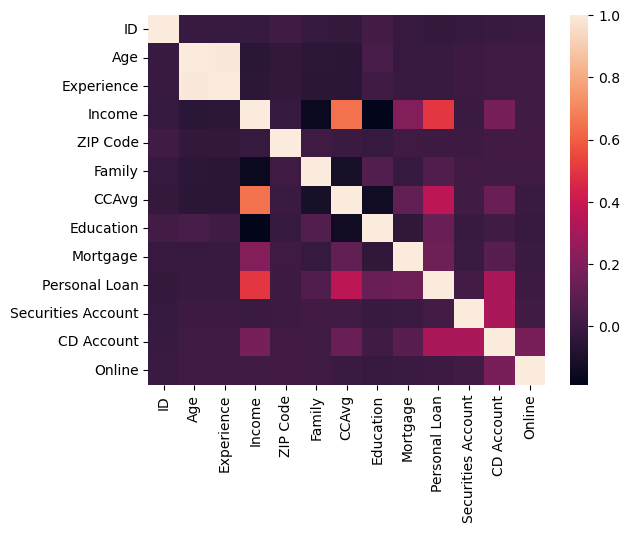

In [8]:
# Show dimensions
print(loan_x.shape)
print(loan_y.shape)

loan_x.corr()

sns.heatmap(loan_x.corr())

HISTOGRAM OF INCOME DISTRIBUTION

Text(0, 0.5, 'Frequency')

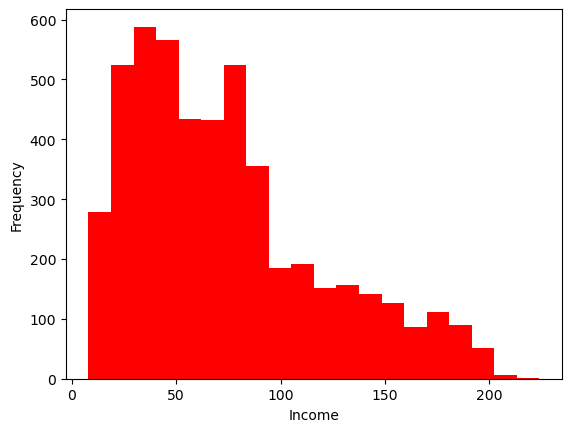

In [9]:
x = loan['Income']
plt.hist(x,bins = 20, color = 'r')
plt.xlabel('Income')
plt.ylabel('Frequency')

HISTOGRAM OF AGE DISTRIBUTION

Text(0, 0.5, 'Frequency')

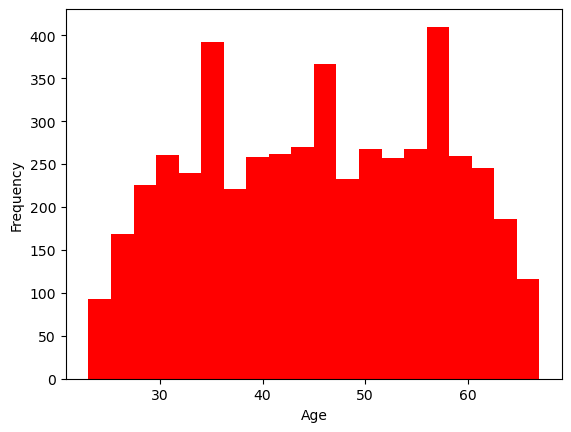

In [10]:
x = loan['Age']
plt.hist(x,bins = 20, color = 'r')
plt.xlabel('Age')
plt.ylabel('Frequency')


HISTOGRAM OF FAMILY SIZE DISTRIBUTION

Text(0, 0.5, 'Frequency')

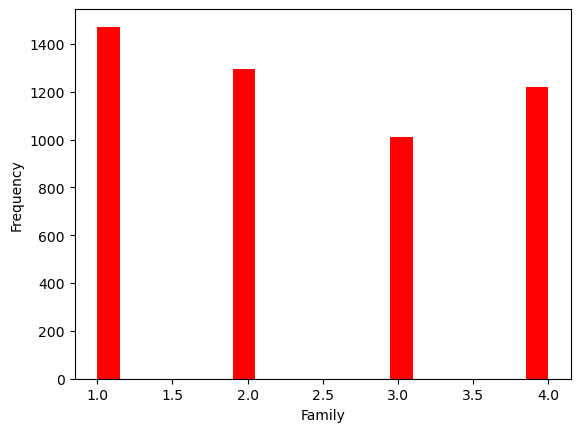

In [11]:
x = loan['Family']
plt.hist(x,bins = 20, color = 'r')
plt.xlabel('Family')
plt.ylabel('Frequency')

HISTOGRAM OF AVERAGE CREDIT CARD SPEND DISTRIBUTION

Text(0, 0.5, 'Frequency')

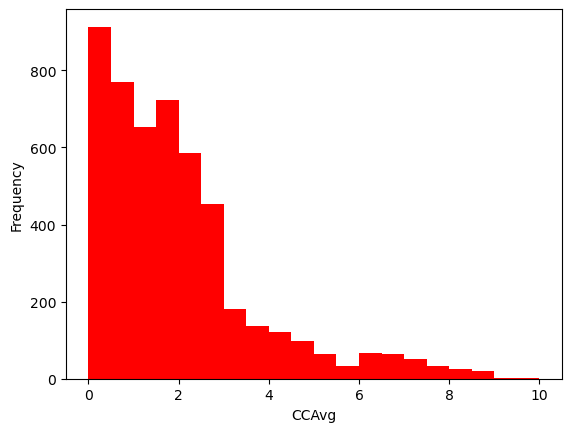

In [12]:
x = loan['CCAvg']
plt.hist(x,bins = 20, color = 'r')
plt.xlabel('CCAvg')
plt.ylabel('Frequency')

In [13]:
from sklearn.model_selection import train_test_split

# Split data into training and test
X_train, X_test, y_train, y_test = train_test_split(loan_x, 
                                                    loan_y, 
                                                    random_state=42)

# Decision Tree 

In [14]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0, criterion='entropy')
dt.fit(X_train, y_train)
dt.score(X_test, y_test), dt.score(X_train, y_train)

(0.6352, 1.0)

In [15]:
# Feature Importance
dt.feature_importances_

array([0.21558034, 0.09780537, 0.07069826, 0.15210417, 0.15098817,
       0.03680094, 0.07382063, 0.02174433, 0.05138141, 0.01290365,
       0.01362672, 0.05529924, 0.04724677])

In [16]:
# A Basic Tree
from sklearn.tree import DecisionTreeClassifier

dt_3 = DecisionTreeClassifier(random_state=0, max_depth=3, criterion='entropy')
dt_3.fit(X_train, y_train)
dt_3.score(X_test, y_test), dt_3.score(X_train, y_train)

(0.7528, 0.7429333333333333)

In [17]:
# GridSearch with Cross-Validation

from sklearn.model_selection import GridSearchCV

optimal_tree = DecisionTreeClassifier(random_state = 0)

dt_params = {'max_depth':  range(1,10)         ,
             'min_samples_split':   range(2,11),
             'max_leaf_nodes':    range(2,11)   }

grid_tree = GridSearchCV(optimal_tree, dt_params)
grid_tree.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(1, 10),
                         'max_leaf_nodes': range(2, 11),
                         'min_samples_split': range(2, 11)})

In [18]:
# Report the best hyperparameters chosen

grid_tree.best_params_

{'max_depth': 3, 'max_leaf_nodes': 7, 'min_samples_split': 2}

In [19]:
grid_tree.best_score_

0.7421333333333333

In [20]:
# Visualizing the tree 

from sklearn import tree
print(tree.export_text(grid_tree.best_estimator_))

|--- feature_11 <= 0.50
|   |--- feature_10 <= 0.50
|   |   |--- feature_9 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_9 >  0.50
|   |   |   |--- class: 0
|   |--- feature_10 >  0.50
|   |   |--- feature_12 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_12 >  0.50
|   |   |   |--- class: 0
|--- feature_11 >  0.50
|   |--- feature_10 <= 0.50
|   |   |--- class: 1
|   |--- feature_10 >  0.50
|   |   |--- feature_9 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_9 >  0.50
|   |   |   |--- class: 0



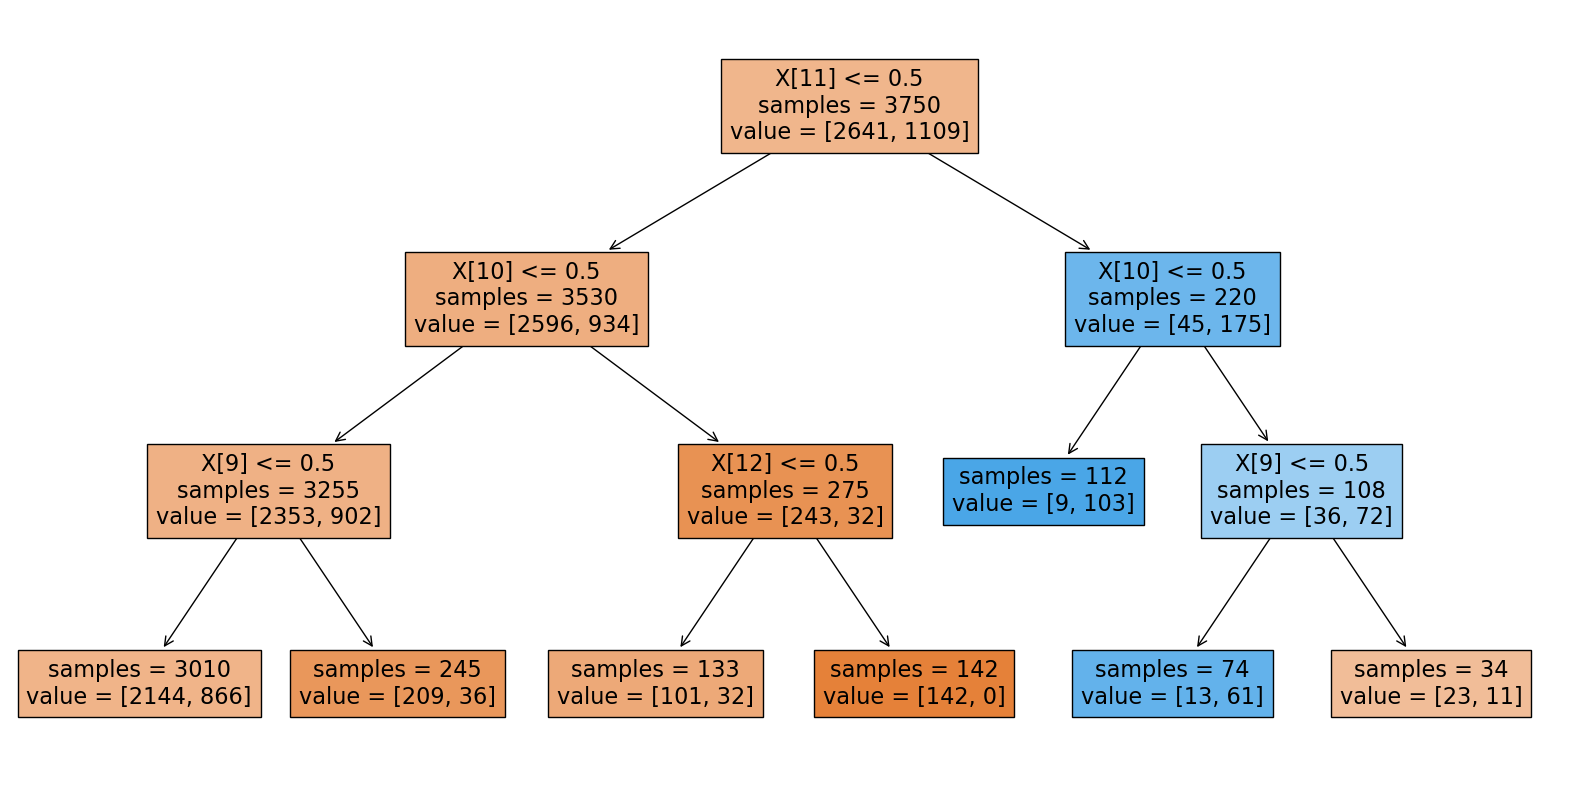

In [21]:
# Plot the decision tree
from sklearn import tree
fig = plt.figure(figsize=(20,10)) 

tree.plot_tree(grid_tree.best_estimator_, 
               
               filled = True, impurity = False) 
plt.show()


# Support Vector Machine Model 

In [22]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(loan_x, loan_y, test_size= 0.25, random_state = 42)

In [23]:
from sklearn.svm import SVC
SVM_model = SVC(kernel = 'linear', random_state = 0)
SVM_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [24]:
y_pred1 = SVM_model.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
conf_matrix = confusion_matrix(y_test, y_pred1)
print(conf_matrix)

[[889   0]
 [361   0]]


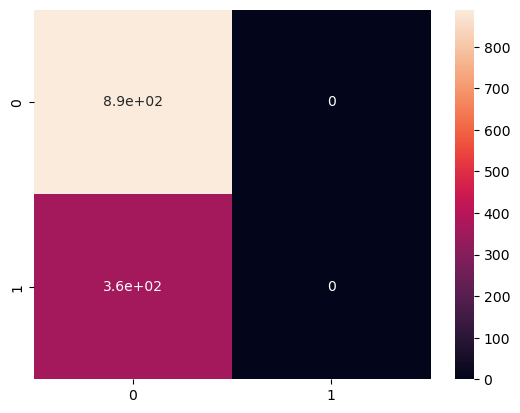

In [25]:
sns.heatmap(conf_matrix,annot=True)
plt.show()

In [26]:
SVM_accuracy= accuracy_score(y_test, y_pred1)
print("Accuracy score for SVM Model: {:.2f} %".format(SVM_accuracy*100))

Accuracy score for SVM Model: 71.12 %


# RANDOM FOREST

In [27]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RF_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [28]:
y_pred2 = RF_model.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
conf_matrix = confusion_matrix(y_test, y_pred2)
print(conf_matrix)

[[821  68]
 [282  79]]


In [29]:
RF_accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy score for Random Forest Classification Model: {:.2f} %".format(RF_accuracy*100))

Accuracy score for Random Forest Classification Model: 72.00 %


# NAIVE BAYES

In [30]:
from sklearn.naive_bayes import GaussianNB

NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [31]:
NB_model.score(X_test, y_test), NB_model.score(X_train, y_train)

(0.7496, 0.7392)

In [32]:
y_pred3 = NB_model.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
conf_matrix = confusion_matrix(y_test, y_pred3)
print(conf_matrix)

[[872  17]
 [296  65]]


In [33]:
NB_accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy score for Naive Bayes Classification Model: {:.2f} %".format(NB_accuracy*100))

Accuracy score for Naive Bayes Classification Model: 74.96 %


# Logistic Regression 

### Logistic regression is a type of classification algorithm
These are our predictors = 'Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'


In [34]:
# Data Splitting, check sample
from sklearn.model_selection import train_test_split
# Choose predictors to construct attribute matrix (X) and target (Y) accordingly.
var = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'] # define a list of variables.
X = loan[var] # Define the X to be used (i.e., based on selected var)
y = loan['Personal Loan'] # Define the Y

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state=42)

# Compare the data distributions
print(np.mean(y_train), np.mean(y))

0.09228571428571429 0.096


### 
9.2% training set are positive
9.6% values of the entire dataset are positive

In [35]:
from sklearn.linear_model import LogisticRegression
# Run the Logistic Regression Model: 
## (a) Define function, train the model. Report coefficient.
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Coef is: ", logreg.coef_)

## (b) Accuracy
print("Accuracy is:", logreg.score(X_test, y_test))
# Get it manually
y_pred = logreg.predict(X_test)
# y_test == y_pred
np.sum(y_test == y_pred)/y_test.shape[0]

Coef is:  [[-5.14295598e-01  5.19181006e-01  5.03997176e-02  5.59849728e-01
   1.18833807e-01  1.77541304e+00  1.02207163e-03  7.56586106e-02
   7.88523368e-01 -8.55797640e-02 -1.62212181e-01]]
Accuracy is: 0.946


0.946

###
Training accuracy - 94.8%
Testing accruacy - 94.6%
which suggests that the model is not overfitting.

###
Confusion matrix is used to evaluate perfection of classification model.

In [36]:
from sklearn.metrics import confusion_matrix

my_matrix = confusion_matrix(y_test, y_pred)
my_matrix

array([[1328,   15],
       [  66,   91]], dtype=int64)

In [37]:
print("TP is:", my_matrix[1, 1])
print("TN is:", my_matrix[0, 0])
print("FP is:", my_matrix[0, 1])
print("FN is:", my_matrix[1, 0])

TP is: 91
TN is: 1328
FP is: 15
FN is: 66


In [38]:
from sklearn.metrics import (precision_score, recall_score, 
accuracy_score, f1_score)

print('Precision score:', precision_score(y_test, y_pred) )
print('Recall score:', recall_score(y_test, y_pred))
print('Accuracy score:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

Precision score: 0.8584905660377359
Recall score: 0.5796178343949044
Accuracy score: 0.946
F1 score: 0.6920152091254753


Text(0.5, 1.0, 'precision-Recall Curve')

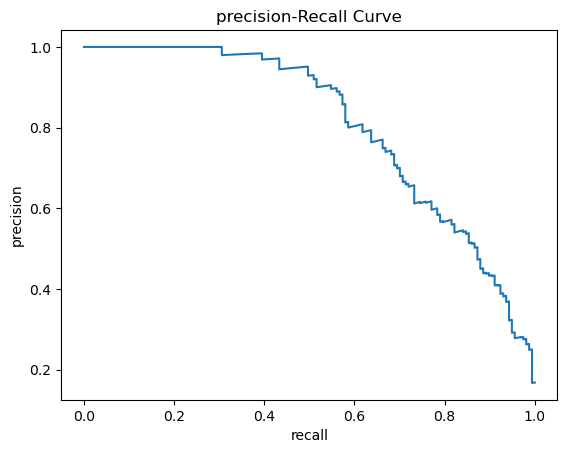

In [39]:
from sklearn.metrics import precision_recall_curve

# S1. Get probability
log_reg_prob = logreg.predict_proba(X_test)[:, 1]

# S2. Collect Necessary Measures
precision, recall, threshold = precision_recall_curve(y_test, 
log_reg_prob)

# S3. Plot Figure
plt.plot(recall, precision)
plt.xlabel("recall")
plt.ylabel("precision")
plt.title("precision-Recall Curve")

In [40]:
from sklearn.metrics import roc_auc_score
# we have obtained the predicted probability 
# in the previous step: y_pred_proba
print("AUC for logistic regression:",roc_auc_score(y_test, log_reg_prob) )

AUC for logistic regression: 0.9559025093549474


Text(0.5, 1.0, 'ROC')

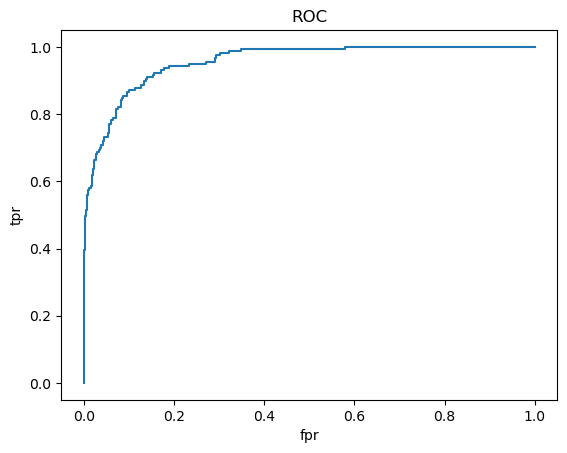

In [41]:
from sklearn.metrics import roc_curve

# Predicted Probability: y_pred_proba
# Get Measures

# Generate Figure
fpr, tpr, threshold =  roc_curve(y_test, log_reg_prob)

plt.plot(fpr, tpr)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC")

# Clustering Preprocessing 

In [42]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans as km
loan

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [43]:
# Clustering 1.1: Transforming categorical variables to binary columns
loanC = loan.copy()
ohe = OneHotEncoder()
loanC2 = ohe.fit_transform(loanC[['Education']])
loanC2

<5000x3 sparse matrix of type '<class 'numpy.float64'>'
	with 5000 stored elements in Compressed Sparse Row format>

In [44]:
# Checking column categories
print(ohe.categories_[0])

[1 2 3]


In [45]:
# Adding separated categories as additional columns to the dataset, and populating with respective values
loanC[ohe.categories_[0]] = loanC2.toarray()

In [46]:
loanC

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,1,2,3
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,1.0,0.0,0.0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,1.0,0.0,0.0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,1.0,0.0,0.0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0.0,1.0,0.0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0,0.0,0.0,1.0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0,1.0,0.0,0.0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0,0.0,0.0,1.0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0,0.0,1.0,0.0


In [47]:
# Dropping the original column and giving the separated columns their appropriate labels
loanC = loanC.drop(['Education'], axis=1)
loanC = loanC.rename(columns={1: 'Undergrad', 2: 'Grad', 3: 'Adv/Prof'})
loanC

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Undergrad,Grad,Adv/Prof
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0,1.0,0.0,0.0
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0,1.0,0.0,0.0
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0,1.0,0.0,0.0
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0,0.0,1.0,0.0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,0,0,0,0,1,0,0.0,0.0,1.0
4996,4997,30,4,15,92037,4,0.4,85,0,0,0,1,0,1.0,0.0,0.0
4997,4998,63,39,24,93023,2,0.3,0,0,0,0,0,0,0.0,0.0,1.0
4998,4999,65,40,49,90034,3,0.5,0,0,0,0,1,0,0.0,1.0,0.0


In [48]:
# Repeating the process for all other applicable variables
loanC2 = ohe.fit_transform(loanC[['Personal Loan']])
loanC2

<5000x2 sparse matrix of type '<class 'numpy.float64'>'
	with 5000 stored elements in Compressed Sparse Row format>

In [49]:
print(ohe.categories_[0])

[0 1]


In [50]:
loanC[ohe.categories_[0]] = loanC2.toarray()

In [51]:
loanC

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Undergrad,Grad,Adv/Prof,0,1
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0,1.0,0.0,0.0,1.0,0.0
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0,1.0,0.0,0.0,1.0,0.0
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.0
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0,0.0,1.0,0.0,1.0,0.0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,0,0,0,0,1,0,0.0,0.0,1.0,1.0,0.0
4996,4997,30,4,15,92037,4,0.4,85,0,0,0,1,0,1.0,0.0,0.0,1.0,0.0
4997,4998,63,39,24,93023,2,0.3,0,0,0,0,0,0,0.0,0.0,1.0,1.0,0.0
4998,4999,65,40,49,90034,3,0.5,0,0,0,0,1,0,0.0,1.0,0.0,1.0,0.0


In [52]:
loanC = loanC.drop(['Personal Loan'], axis=1)
loanC = loanC.rename(columns={0: 'Personal Loan F', 1: 'Personal Loan T'})
loanC

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Undergrad,Grad,Adv/Prof,Personal Loan F,Personal Loan T
0,1,25,1,49,91107,4,1.6,0,1,0,0,0,1.0,0.0,0.0,1.0,0.0
1,2,45,19,34,90089,3,1.5,0,1,0,0,0,1.0,0.0,0.0,1.0,0.0
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.0
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0.0,1.0,0.0,1.0,0.0
4,5,35,8,45,91330,4,1.0,0,0,0,0,1,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,0,0,0,1,0,0.0,0.0,1.0,1.0,0.0
4996,4997,30,4,15,92037,4,0.4,85,0,0,1,0,1.0,0.0,0.0,1.0,0.0
4997,4998,63,39,24,93023,2,0.3,0,0,0,0,0,0.0,0.0,1.0,1.0,0.0
4998,4999,65,40,49,90034,3,0.5,0,0,0,1,0,0.0,1.0,0.0,1.0,0.0


In [53]:
loanC2 = ohe.fit_transform(loanC[['Securities Account']])
loanC2

<5000x2 sparse matrix of type '<class 'numpy.float64'>'
	with 5000 stored elements in Compressed Sparse Row format>

In [54]:
print(ohe.categories_[0])

[0 1]


In [55]:
loanC[ohe.categories_[0]] = loanC2.toarray()

In [56]:
loanC

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Undergrad,Grad,Adv/Prof,Personal Loan F,Personal Loan T,0,1
0,1,25,1,49,91107,4,1.6,0,1,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,45,19,34,90089,3,1.5,0,1,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5,35,8,45,91330,4,1.0,0,0,0,0,1,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,0,0,0,1,0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4996,4997,30,4,15,92037,4,0.4,85,0,0,1,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4997,4998,63,39,24,93023,2,0.3,0,0,0,0,0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4998,4999,65,40,49,90034,3,0.5,0,0,0,1,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [57]:
loanC = loanC.drop(['Securities Account'], axis=1)
loanC = loanC.rename(columns={0: 'Securities Account F', 1: 'Securities Account T'})
loanC

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,CD Account,Online,CreditCard,Undergrad,Grad,Adv/Prof,Personal Loan F,Personal Loan T,Securities Account F,Securities Account T
0,1,25,1,49,91107,4,1.6,0,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,45,19,34,90089,3,1.5,0,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,3,39,15,11,94720,1,1.0,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,4,35,9,100,94112,1,2.7,0,0,0,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5,35,8,45,91330,4,1.0,0,0,0,1,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,0,0,1,0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4996,4997,30,4,15,92037,4,0.4,85,0,1,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4997,4998,63,39,24,93023,2,0.3,0,0,0,0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4998,4999,65,40,49,90034,3,0.5,0,0,1,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [58]:
loanC2 = ohe.fit_transform(loanC[['CD Account']])
loanC2

<5000x2 sparse matrix of type '<class 'numpy.float64'>'
	with 5000 stored elements in Compressed Sparse Row format>

In [59]:
print(ohe.categories_[0])

[0 1]


In [60]:
loanC[ohe.categories_[0]] = loanC2.toarray()

In [61]:
loanC = loanC.drop(['CD Account'], axis=1)
loanC = loanC.rename(columns={0: 'CD Account F', 1: 'CD Account T'}) 

In [62]:
loanC2 = ohe.fit_transform(loanC[['Online']])
loanC2

<5000x2 sparse matrix of type '<class 'numpy.float64'>'
	with 5000 stored elements in Compressed Sparse Row format>

In [63]:
print(ohe.categories_[0])

[0 1]


In [64]:
loanC[ohe.categories_[0]] = loanC2.toarray()

In [65]:
loanC = loanC.drop(['Online'], axis=1)
loanC = loanC.rename(columns={0: 'Online F', 1: 'Online T'})

In [66]:
loanC2 = ohe.fit_transform(loanC[['CreditCard']])
loanC2

<5000x2 sparse matrix of type '<class 'numpy.float64'>'
	with 5000 stored elements in Compressed Sparse Row format>

In [67]:
print(ohe.categories_[0])

[0 1]


In [68]:
loanC[ohe.categories_[0]] = loanC2.toarray()

In [69]:
loanC = loanC.drop(['CreditCard'], axis=1)
loanC = loanC.rename(columns={0: 'CreditCard F', 1: 'CreditCard T'})
loanC

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Undergrad,Grad,...,Personal Loan F,Personal Loan T,Securities Account F,Securities Account T,CD Account F,CD Account T,Online F,Online T,CreditCard F,CreditCard T
0,1,25,1,49,91107,4,1.6,0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2,45,19,34,90089,3,1.5,0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3,39,15,11,94720,1,1.0,0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4,35,9,100,94112,1,2.7,0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5,35,8,45,91330,4,1.0,0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4996,4997,30,4,15,92037,4,0.4,85,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4997,4998,63,39,24,93023,2,0.3,0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4998,4999,65,40,49,90034,3,0.5,0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [70]:
# Clustering 1.2: Normalizing numerical variables
loanCNor = loanC[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']]
loanCNor2 = normalize(loanCNor)
loanCNor2

array([[0.45300858, 0.01812034, 0.88789682, 0.07248137, 0.02899255,
        0.        ],
       [0.75491774, 0.31874305, 0.57038229, 0.05032785, 0.02516392,
        0.        ],
       [0.90211095, 0.34696575, 0.25444155, 0.02313105, 0.02313105,
        0.        ],
       ...,
       [0.80861722, 0.50057256, 0.30804465, 0.02567039, 0.00385056,
        0.        ],
       [0.71626703, 0.44077971, 0.53995515, 0.03305848, 0.00550975,
        0.        ],
       [0.3191178 , 0.04558826, 0.94595633, 0.03419119, 0.00911765,
        0.        ]])

In [71]:
# Converting the normalized variables to a df format
loanCNor3 = pd.DataFrame(loanCNor2, columns=['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage'])
loanCNor3

,Age,Experience,Income,Family,CCAvg,Mortgage
0,0.453009,0.018120,0.887897,0.072481,0.028993,0.000000
1,0.754918,0.318743,0.570382,0.050328,0.025164,0.000000
2,0.902111,0.346966,0.254442,0.023131,0.023131,0.000000
3,0.329044,0.084611,0.940127,0.009401,0.025383,0.000000
4,0.606430,0.138613,0.779696,0.069306,0.017327,0.000000
...,...,...,...,...,...,...
4995,0.585338,0.060552,0.807363,0.020184,0.038350,0.000000
4996,0.327675,0.043690,0.163837,0.043690,0.004369,0.928412
4997,0.808617,0.500573,0.308045,0.025670,0.003851,0.000000
4998,0.716267,0.440780,0.539955,0.033058,0.005510,0.000000


In [72]:
# Adding the normalized numerical values to the clustering dataset 
loanCNor4 = loanC.copy()
loanCNor4['Age'] = loanCNor3['Age']
loanCNor4['Experience'] = loanCNor3['Experience']
loanCNor4['Income'] = loanCNor3['Income']
loanCNor4['Family'] = loanCNor3['Family']
loanCNor4['CCAvg'] = loanCNor3['CCAvg']
loanCNor4['Mortgage'] = loanCNor3['Mortgage']
# Dropping columns not relevant to the clustering analysis
loanCNor4 = loanCNor4.drop(['ID','ZIP Code'], axis = 1)
loanCNor4

,Age,Experience,Income,Family,CCAvg,Mortgage,Undergrad,Grad,Adv/Prof,Personal Loan F,Personal Loan T,Securities Account F,Securities Account T,CD Account F,CD Account T,Online F,Online T,CreditCard F,CreditCard T
0,0.453009,0.018120,0.887897,0.072481,0.028993,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.754918,0.318743,0.570382,0.050328,0.025164,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.902111,0.346966,0.254442,0.023131,0.023131,0.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.329044,0.084611,0.940127,0.009401,0.025383,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.606430,0.138613,0.779696,0.069306,0.017327,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.585338,0.060552,0.807363,0.020184,0.038350,0.000000,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4996,0.327675,0.043690,0.163837,0.043690,0.004369,0.928412,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4997,0.808617,0.500573,0.308045,0.025670,0.003851,0.000000,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4998,0.716267,0.440780,0.539955,0.033058,0.005510,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


# Clustering: Testing Different K Values

In [73]:
# Clustering 2.1: fitting models with different cluster counts
clus3 = km(n_clusters=3, random_state=0)
clus3.fit(loanCNor4)

KMeans(n_clusters=3, random_state=0)

In [74]:
clus3.cluster_centers_

array([[ 4.57678822e-01,  1.93727602e-01,  6.10625824e-01,
         2.54949005e-02,  1.68830643e-02,  2.71313585e-01,
         4.29271709e-01,  2.61904762e-01,  3.08823529e-01,
         9.10364146e-01,  8.96358543e-02,  8.99159664e-01,
         1.00840336e-01,  9.97899160e-01,  2.10084034e-03,
         1.00000000e+00, -1.55431223e-15,  1.00000000e+00,
         1.11022302e-15],
       [ 4.60333944e-01,  1.96682660e-01,  6.17532559e-01,
         2.55970844e-02,  1.65000254e-02,  2.63816986e-01,
         4.04376784e-01,  2.99238820e-01,  2.96384396e-01,
         9.00570885e-01,  9.94291151e-02,  8.88201713e-01,
         1.11798287e-01,  9.71931494e-01,  2.80685062e-02,
         1.44328993e-15,  1.00000000e+00,  1.00000000e+00,
         1.66533454e-15],
       [ 4.61329162e-01,  1.97406806e-01,  6.13715643e-01,
         2.58924216e-02,  1.63398204e-02,  2.63278781e-01,
         4.30612245e-01,  2.72108844e-01,  2.97278912e-01,
         9.02721088e-01,  9.72789116e-02,  9.02721088e-01,
    

In [75]:
# 2.2 Adjusting the cluster label numbering to start from 1 instead of 0
clusters3 = clus3.labels_ + 1
clusters3

array([1, 1, 1, ..., 1, 2, 3])

In [76]:
# 2.3 Adding a column to the original table identifying the cluster each record belongs to
loanC_clus3 = loanC.copy()
loanC_clus3['CLUSTER'] = clusters3.tolist()
loanC_clus3

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Undergrad,Grad,...,Personal Loan T,Securities Account F,Securities Account T,CD Account F,CD Account T,Online F,Online T,CreditCard F,CreditCard T,CLUSTER
0,1,25,1,49,91107,4,1.6,0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1
1,2,45,19,34,90089,3,1.5,0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1
2,3,39,15,11,94720,1,1.0,0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
3,4,35,9,100,94112,1,2.7,0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
4,5,35,8,45,91330,4,1.0,0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2
4996,4997,30,4,15,92037,4,0.4,85,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2
4997,4998,63,39,24,93023,2,0.3,0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
4998,4999,65,40,49,90034,3,0.5,0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2


In [77]:
# 2.4 Checking cluster sizes 
loanC_clus3['CLUSTER'].value_counts()

2    2102
3    1470
1    1428
Name: CLUSTER, dtype: int64

In [78]:
# 2.5 Getting averages by cluster to see how the clusters are different 
loanC_clus3Avg = loanC_clus3.groupby('CLUSTER', as_index=False).mean()
loanC_clus3Avg.to_csv('loanC.csv')
loanC_clus3Avg.drop(['ID','ZIP Code'], axis=1, inplace=True)
loanC_clus3Avg

,CLUSTER,Age,Experience,Income,Family,CCAvg,Mortgage,Undergrad,Grad,Adv/Prof,Personal Loan F,Personal Loan T,Securities Account F,Securities Account T,CD Account F,CD Account T,Online F,Online T,CreditCard F,CreditCard T
0,1,45.142157,19.897759,73.554622,2.376050,1.954895,58.600140,0.429272,0.261905,0.308824,0.910364,0.089636,0.899160,0.100840,0.997899,0.002101,1.0,0.0,1.0,0.0
1,2,45.376308,20.133682,74.042341,2.395814,1.939087,55.868221,0.404377,0.299239,0.296384,0.900571,0.099429,0.888202,0.111798,0.971931,0.028069,0.0,1.0,1.0,0.0
2,3,45.474830,20.263946,73.604082,2.417007,1.919823,55.359184,0.430612,0.272109,0.297279,0.902721,0.097279,0.902721,0.097279,0.836735,0.163265,0.4,0.6,0.0,1.0


In [79]:
# 4 clusters
clus4 = km(n_clusters=4, random_state=0)
clus4.fit(loanCNor4)

KMeans(n_clusters=4, random_state=0)

In [80]:
clusters4 = clus4.labels_ + 1

In [81]:
loanC_clus4 = loanC.copy()
loanC_clus4['CLUSTER'] = clusters4.tolist()
loanC_clus4
loanC_clus4['CLUSTER'].value_counts()

2    2102
1    1428
4     882
3     588
Name: CLUSTER, dtype: int64

In [82]:
loanC_clus4Avg = loanC_clus4.groupby('CLUSTER', as_index=False).mean()
loanC_clus4Avg.drop(['ID','ZIP Code'], axis=1, inplace=True)
loanC_clus4Avg

,CLUSTER,Age,Experience,Income,Family,CCAvg,Mortgage,Undergrad,Grad,Adv/Prof,Personal Loan F,Personal Loan T,Securities Account F,Securities Account T,CD Account F,CD Account T,Online F,Online T,CreditCard F,CreditCard T
0,1,45.142157,19.897759,73.554622,2.376050,1.954895,58.600140,0.429272,0.261905,0.308824,0.910364,0.089636,0.899160,0.100840,0.997899,0.002101,1.0,0.0,1.0,0.0
1,2,45.376308,20.133682,74.042341,2.395814,1.939087,55.868221,0.404377,0.299239,0.296384,0.900571,0.099429,0.888202,0.111798,0.971931,0.028069,0.0,1.0,1.0,0.0
2,3,45.159864,19.942177,71.579932,2.396259,1.923078,53.938776,0.387755,0.287415,0.324830,0.896259,0.103741,0.903061,0.096939,0.972789,0.027211,1.0,0.0,0.0,1.0
3,4,45.684807,20.478458,74.953515,2.430839,1.917653,56.306122,0.459184,0.261905,0.278912,0.907029,0.092971,0.902494,0.097506,0.746032,0.253968,0.0,1.0,0.0,1.0


In [83]:
# 5 clusters
clus5 = km(n_clusters=5, random_state=0)
clus5.fit(loanCNor4)
clusters5 = clus5.labels_ + 1
loanC_clus5 = loanC.copy()
loanC_clus5['CLUSTER'] = clusters5.tolist()
loanC_clus5
loanC_clus5['CLUSTER'].value_counts()
loanC_clus5Avg = loanC_clus5.groupby('CLUSTER', as_index=False).mean()
loanC_clus5Avg.drop(['ID','ZIP Code'], axis=1, inplace=True)
loanC_clus5Avg

,CLUSTER,Age,Experience,Income,Family,CCAvg,Mortgage,Undergrad,Grad,Adv/Prof,Personal Loan F,Personal Loan T,Securities Account F,Securities Account T,CD Account F,CD Account T,Online F,Online T,CreditCard F,CreditCard T
0,1,45.684807,20.478458,74.953515,2.430839,1.917653,56.306122,0.459184,0.261905,0.278912,0.907029,0.092971,0.902494,0.097506,0.746032,0.253968,0.0,1.0,0.0,1.0
1,2,44.731765,19.834118,87.001176,2.209412,2.294800,62.224706,1.000000,0.000000,0.000000,0.961176,0.038824,0.885882,0.114118,0.977647,0.022353,0.0,1.0,1.0,0.0
2,3,45.813898,20.337061,65.244409,2.522364,1.697588,51.552716,0.000000,0.502396,0.497604,0.859425,0.140575,0.889776,0.110224,0.968051,0.031949,0.0,1.0,1.0,0.0
3,4,45.159864,19.942177,71.579932,2.396259,1.923078,53.938776,0.387755,0.287415,0.324830,0.896259,0.103741,0.903061,0.096939,0.972789,0.027211,1.0,0.0,0.0,1.0
4,5,45.142157,19.897759,73.554622,2.376050,1.954895,58.600140,0.429272,0.261905,0.308824,0.910364,0.089636,0.899160,0.100840,0.997899,0.002101,1.0,0.0,1.0,0.0


In [84]:
# 6 clusters
clus6 = km(n_clusters=6, random_state=0)
clus6.fit(loanCNor4)
clusters6 = clus6.labels_ + 1
loanC_clus6 = loanC.copy()
loanC_clus6['CLUSTER'] = clusters6.tolist()
loanC_clus6
loanC_clus6['CLUSTER'].value_counts()
loanC_clus6Avg = loanC_clus6.groupby('CLUSTER', as_index=False).mean()
loanC_clus6Avg.drop(['ID','ZIP Code'], axis=1, inplace=True)
loanC_clus6Avg

,CLUSTER,Age,Experience,Income,Family,CCAvg,Mortgage,Undergrad,Grad,Adv/Prof,Personal Loan F,Personal Loan T,Securities Account F,Securities Account T,CD Account F,CD Account T,Online F,Online T,CreditCard F,CreditCard T
0,1,46.156955,20.489662,65.642857,2.381579,1.726184,51.990602,0.000000,0.000000,1.000000,0.862782,0.137218,0.904135,0.095865,0.984962,0.015038,0.414474,0.585526,1.0,0.0
1,2,44.957129,19.679960,64.008973,2.672981,1.685314,51.723829,0.000000,1.000000,0.000000,0.870389,0.129611,0.882353,0.117647,0.975075,0.024925,0.372881,0.627119,1.0,0.0
2,3,45.159864,19.942177,71.579932,2.396259,1.923078,53.938776,0.387755,0.287415,0.324830,0.896259,0.103741,0.903061,0.096939,0.972789,0.027211,1.000000,0.000000,0.0,1.0
3,4,44.731765,19.834118,87.001176,2.209412,2.294800,62.224706,1.000000,0.000000,0.000000,0.961176,0.038824,0.885882,0.114118,0.977647,0.022353,0.000000,1.000000,1.0,0.0
4,5,45.055465,20.123980,85.933116,2.179445,2.267439,66.929853,1.000000,0.000000,0.000000,0.954323,0.045677,0.898858,0.101142,0.996737,0.003263,1.000000,0.000000,1.0,0.0
5,6,45.684807,20.478458,74.953515,2.430839,1.917653,56.306122,0.459184,0.261905,0.278912,0.907029,0.092971,0.902494,0.097506,0.746032,0.253968,0.000000,1.000000,0.0,1.0


In [85]:
# 7 clusters
clus7 = km(n_clusters=7, random_state=0)
clus7.fit(loanCNor4)
clusters7 = clus7.labels_ + 1
loanC_clus7 = loanC.copy()
loanC_clus7['CLUSTER'] = clusters7.tolist()
loanC_clus7
loanC_clus7['CLUSTER'].value_counts()
loanC_clus7Avg = loanC_clus7.groupby('CLUSTER', as_index=False).mean()
loanC_clus7Avg.drop(['ID','ZIP Code'], axis=1, inplace=True)
loanC_clus7Avg

,CLUSTER,Age,Experience,Income,Family,CCAvg,Mortgage,Undergrad,Grad,Adv/Prof,Personal Loan F,Personal Loan T,Securities Account F,Securities Account T,CD Account F,CD Account T,Online F,Online T,CreditCard F,CreditCard T
0,1,45.149822,20.261593,85.356718,2.208086,2.271891,64.699168,1.000000,0.000000,0.000000,0.950059,0.049941,0.901308,0.098692,0.991677,0.008323,1.0,0.0,0.728894,0.271106
1,2,45.684807,20.478458,74.953515,2.430839,1.917653,56.306122,0.459184,0.261905,0.278912,0.907029,0.092971,0.902494,0.097506,0.746032,0.253968,0.0,1.0,0.000000,1.000000
2,3,46.402889,20.736758,65.616372,2.362761,1.715586,52.300161,0.000000,0.000000,1.000000,0.863563,0.136437,0.910112,0.089888,0.974318,0.025682,0.0,1.0,1.000000,0.000000
3,4,45.230525,19.941176,64.875994,2.680445,1.679762,50.812401,0.000000,1.000000,0.000000,0.855326,0.144674,0.869634,0.130366,0.961844,0.038156,0.0,1.0,1.000000,0.000000
4,5,44.624309,19.362799,62.412523,2.618785,1.691694,53.478821,0.000000,1.000000,0.000000,0.887661,0.112339,0.902394,0.097606,0.990792,0.009208,1.0,0.0,0.688766,0.311234
5,6,44.731765,19.834118,87.001176,2.209412,2.294800,62.224706,1.000000,0.000000,0.000000,0.961176,0.038824,0.885882,0.114118,0.977647,0.022353,0.0,1.0,1.000000,0.000000
6,7,45.593354,19.914557,65.585443,2.409810,1.729604,50.547468,0.000000,0.000000,1.000000,0.863924,0.136076,0.897152,0.102848,0.988924,0.011076,1.0,0.0,0.697785,0.302215


In [86]:
## 8 clusters
clus8 = km(n_clusters=8, random_state=0)
clus8.fit(loanCNor4)
clusters8 = clus8.labels_ + 1
loanC_clus8 = loanC.copy()
loanC_clus8['CLUSTER'] = clusters8.tolist()
loanC_clus8
loanC_clus8['CLUSTER'].value_counts()
loanC_clus8Avg = loanC_clus8.groupby('CLUSTER', as_index=False).mean()
loanC_clus8Avg.drop(['ID','ZIP Code'], axis=1, inplace=True)
loanC_clus8Avg

,CLUSTER,Age,Experience,Income,Family,CCAvg,Mortgage,Undergrad,Grad,Adv/Prof,Personal Loan F,Personal Loan T,Securities Account F,Securities Account T,CD Account F,CD Account T,Online F,Online T,CreditCard F,CreditCard T
0,1,46.698718,21.025641,61.266667,2.361538,1.568654,49.458974,0.000000,0.000000,1.000000,0.910256,0.089744,0.942308,0.057692,1.0,0.0,0.000000,1.000000,0.778205,0.221795
1,2,45.062193,20.130933,85.859247,2.180033,2.264714,66.869067,1.000000,0.000000,0.000000,0.957447,0.042553,0.901800,0.098200,1.0,0.0,1.000000,0.000000,1.000000,0.000000
2,3,44.993814,19.909278,71.379381,2.439175,1.793093,43.944330,0.645361,0.354639,0.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.0,0.000000,1.000000,0.000000,1.000000
3,4,45.143357,19.931818,70.333916,2.398601,1.876346,53.440559,0.389860,0.288462,0.321678,0.912587,0.087413,0.921329,0.078671,1.0,0.0,1.000000,0.000000,0.000000,1.000000
4,5,45.244628,19.948760,62.742149,2.687603,1.619008,48.371901,0.000000,1.000000,0.000000,0.882645,0.117355,0.895868,0.104132,1.0,0.0,0.000000,1.000000,1.000000,0.000000
5,6,44.669073,19.772563,86.678700,2.202166,2.280842,62.410349,1.000000,0.000000,0.000000,0.971119,0.028881,0.902527,0.097473,1.0,0.0,0.000000,1.000000,1.000000,0.000000
6,7,45.202703,19.721130,64.125307,2.523342,1.713943,51.803440,0.000000,0.458231,0.541769,0.878378,0.121622,0.900491,0.099509,1.0,0.0,1.000000,0.000000,1.000000,0.000000
7,8,45.701987,20.572848,104.589404,2.460265,2.878974,92.324503,0.390728,0.291391,0.317881,0.536424,0.463576,0.513245,0.486755,0.0,1.0,0.062914,0.937086,0.205298,0.794702


In [87]:
loanC_clus8Avg[7:]

,CLUSTER,Age,Experience,Income,Family,CCAvg,Mortgage,Undergrad,Grad,Adv/Prof,Personal Loan F,Personal Loan T,Securities Account F,Securities Account T,CD Account F,CD Account T,Online F,Online T,CreditCard F,CreditCard T
7,8,45.701987,20.572848,104.589404,2.460265,2.878974,92.324503,0.390728,0.291391,0.317881,0.536424,0.463576,0.513245,0.486755,0.0,1.0,0.062914,0.937086,0.205298,0.794702


In [88]:
# Counting the number of records in each cluster
loanC_clus8['CLUSTER'].value_counts()

6    831
7    814
1    780
2    611
5    605
4    572
3    485
8    302
Name: CLUSTER, dtype: int64

In [89]:
## Cluster 8 Demographic Notable Customer Characteristics

# Annual Income: $104,589.40
# CC spend Avg per month: $2,878.974
# Mortgage value: $92,324.50
# Online Banking User: 93.71%
# Thera Bank Credit Card user: 79.47%

## What does this mean for Thera Bank ?
# Success rate if all customers targeted for personal loan purchases: 0.096
# Targeting customers within the demographics associated with cluster 8 leads to a 5x increase in success rate

In [90]:
# Checking 9 & 10 clusters models to look for a possible increase in positive Personal Loan association
clus9 = km(n_clusters=9, random_state=0)
clus9.fit(loanCNor4)
clusters9 = clus9.labels_ + 1
loanC_clus9 = loanC.copy()
loanC_clus9['CLUSTER'] = clusters9.tolist()
loanC_clus9
loanC_clus9['CLUSTER'].value_counts()
loanC_clus9Avg = loanC_clus9.groupby('CLUSTER', as_index=False).mean()
loanC_clus9Avg.drop(['ID','ZIP Code'], axis=1, inplace=True)
loanC_clus9Avg

,CLUSTER,Age,Experience,Income,Family,CCAvg,Mortgage,Undergrad,Grad,Adv/Prof,Personal Loan F,Personal Loan T,Securities Account F,Securities Account T,CD Account F,CD Account T,Online F,Online T,CreditCard F,CreditCard T
0,1,44.485255,19.225201,62.286863,2.659517,1.681769,52.099196,0.000000,1.000000,0.000000,0.898123,0.101877,0.906166,0.093834,1.0,0.0,1.000000,0.000000,1.000000,0.000000
1,2,44.669073,19.772563,86.678700,2.202166,2.280842,62.410349,1.000000,0.000000,0.000000,0.971119,0.028881,0.902527,0.097473,1.0,0.0,0.000000,1.000000,1.000000,0.000000
2,3,46.431631,20.762768,63.481054,2.367381,1.637694,51.116969,0.000000,0.000000,1.000000,0.884679,0.115321,0.925865,0.074135,1.0,0.0,0.000000,1.000000,1.000000,0.000000
3,4,45.809524,20.140590,65.680272,2.408163,1.741156,51.553288,0.000000,0.000000,1.000000,0.861678,0.138322,0.895692,0.104308,1.0,0.0,1.000000,0.000000,1.000000,0.000000
4,5,45.244628,19.948760,62.742149,2.687603,1.619008,48.371901,0.000000,1.000000,0.000000,0.882645,0.117355,0.895868,0.104132,1.0,0.0,0.000000,1.000000,1.000000,0.000000
5,6,45.062193,20.130933,85.859247,2.180033,2.264714,66.869067,1.000000,0.000000,0.000000,0.957447,0.042553,0.901800,0.098200,1.0,0.0,1.000000,0.000000,1.000000,0.000000
6,7,45.688450,20.445289,66.677812,2.413374,1.670395,43.864742,0.475684,0.261398,0.262918,1.000000,0.000000,1.000000,0.000000,1.0,0.0,0.000000,1.000000,0.000000,1.000000
7,8,45.701987,20.572848,104.589404,2.460265,2.878974,92.324503,0.390728,0.291391,0.317881,0.536424,0.463576,0.513245,0.486755,0.0,1.0,0.062914,0.937086,0.205298,0.794702
8,9,45.143357,19.931818,70.333916,2.398601,1.876346,53.440559,0.389860,0.288462,0.321678,0.912587,0.087413,0.921329,0.078671,1.0,0.0,1.000000,0.000000,0.000000,1.000000


In [91]:
clus10 = km(n_clusters=10, random_state=0)
clus10.fit(loanCNor4)
clusters10 = clus10.labels_ + 1
loanC_clus10 = loanC.copy()
loanC_clus10['CLUSTER'] = clusters10.tolist()
loanC_clus10
loanC_clus10['CLUSTER'].value_counts()
loanC_clus10Avg = loanC_clus10.groupby('CLUSTER', as_index=False).mean()
loanC_clus10Avg.drop(['ID','ZIP Code'], axis=1, inplace=True)
loanC_clus10Avg

,CLUSTER,Age,Experience,Income,Family,CCAvg,Mortgage,Undergrad,Grad,Adv/Prof,Personal Loan F,Personal Loan T,Securities Account F,Securities Account T,CD Account F,CD Account T,Online F,Online T,CreditCard F,CreditCard T
0,1,45.150538,19.473118,64.435484,2.403226,1.648871,45.327957,0.000000,0.000000,1.000000,0.876344,0.123656,0.919355,0.080645,0.989247,0.010753,1.000000,0.000000,0.000000,1.000000
1,2,45.244628,19.948760,62.742149,2.687603,1.619008,48.371901,0.000000,1.000000,0.000000,0.882645,0.117355,0.895868,0.104132,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
2,3,45.300448,20.524664,83.269058,2.282511,2.280359,58.367713,1.000000,0.000000,0.000000,0.950673,0.049327,0.928251,0.071749,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
3,4,44.669073,19.772563,86.678700,2.202166,2.280842,62.410349,1.000000,0.000000,0.000000,0.971119,0.028881,0.902527,0.097473,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
4,5,45.062193,20.130933,85.859247,2.180033,2.264714,66.869067,1.000000,0.000000,0.000000,0.957447,0.042553,0.901800,0.098200,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
5,6,46.431631,20.762768,63.481054,2.367381,1.637694,51.116969,0.000000,0.000000,1.000000,0.884679,0.115321,0.925865,0.074135,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
6,7,45.703333,20.566667,104.536667,2.460000,2.864833,92.940000,0.393333,0.293333,0.313333,0.540000,0.460000,0.510000,0.490000,0.000000,1.000000,0.056667,0.943333,0.206667,0.793333
7,8,44.620818,19.360595,61.589219,2.626394,1.664238,53.074349,0.000000,1.000000,0.000000,0.895911,0.104089,0.908922,0.091078,1.000000,0.000000,1.000000,0.000000,0.693309,0.306691
8,9,45.688450,20.445289,66.677812,2.413374,1.670395,43.864742,0.475684,0.261398,0.262918,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
9,10,45.809524,20.140590,65.680272,2.408163,1.741156,51.553288,0.000000,0.000000,1.000000,0.861678,0.138322,0.895692,0.104308,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000


In [92]:
#clus8.labels_

In [93]:
#clus8.cluster_centers_